<a href="https://colab.research.google.com/github/sambhajizambre/Assignments/blob/main/machine_learning_boston_house_price_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

# input
X = boston_pd.iloc[:, :-1]

#output
Y = boston_pd.iloc[:, -1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [5]:
x_train, x_test, y_train, y_test = train_test_split(
	boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
	test_size = 0.25)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


LINEAR REGRESSION

In [15]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)
print (lreg_y_pred)

lreg.fit(x_train,y_train)
# calculating Mean Squared Error (mse)
#mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
#print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their corresponding variable names
#lreg_coefficient = pd.DataFrame()
#lreg_coefficient["Columns"] = x_train.columns
#lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
#print(lreg_coefficient)

[19.34831099 25.29495795 20.61646852 18.65235233 15.90964384 22.84186508
 13.14000588 13.77839463 35.23929791 21.89353    19.62096436 25.1174806
 13.84709737 25.93002337  7.89145389  7.96169093 16.99401391 18.238027
 27.7245898  23.83271439 19.3636787  13.96122885 32.03182331 21.48509878
 10.3802452  29.38532486 13.77069108 10.92577837 18.74960264 -4.89758352
 31.49196581 29.63547232 33.00410537 25.83893738 38.21100735 20.03418782
 23.63195209 17.28567135 31.19327551 13.76347416 20.31656734 35.06554073
 11.69025643 23.07000199 14.10921646 18.5584974  24.5621932  25.99344287
 44.85007244 28.78622794 16.55926185 28.74721839 27.65603737  0.48655917
 20.16679534 17.6925998  27.25799848 19.08619475 27.3452132  19.48489409
 31.24571153 23.14771396 34.47089416 31.35238846 21.8074136  12.15977394
 19.60182103 19.20535993 13.53163713 16.51906144 25.64803021 19.30653218
 29.62270884 17.26741175 25.03384158 12.76779718 13.89624116 19.95431562
 33.69149355 30.16546565 20.09158754 21.13376129 17.09

LinearRegression()

In [17]:
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on test set :  21.53593977007134
    Columns  Coefficient Estimate
0      CRIM             -0.126857
1        ZN              0.052910
2     INDUS              0.026458
3      CHAS              1.956712
4       NOX            -18.463082
5        RM              3.715456
6       AGE              0.002081
7       DIS             -1.652610
8       RAD              0.356643
9       TAX             -0.012820
10  PTRATIO             -1.065186
11        B              0.008383
12    LSTAT             -0.572882


In [18]:
# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)
print(lreg_y_pred)

[19.34831099 25.29495795 20.61646852 18.65235233 15.90964384 22.84186508
 13.14000588 13.77839463 35.23929791 21.89353    19.62096436 25.1174806
 13.84709737 25.93002337  7.89145389  7.96169093 16.99401391 18.238027
 27.7245898  23.83271439 19.3636787  13.96122885 32.03182331 21.48509878
 10.3802452  29.38532486 13.77069108 10.92577837 18.74960264 -4.89758352
 31.49196581 29.63547232 33.00410537 25.83893738 38.21100735 20.03418782
 23.63195209 17.28567135 31.19327551 13.76347416 20.31656734 35.06554073
 11.69025643 23.07000199 14.10921646 18.5584974  24.5621932  25.99344287
 44.85007244 28.78622794 16.55926185 28.74721839 27.65603737  0.48655917
 20.16679534 17.6925998  27.25799848 19.08619475 27.3452132  19.48489409
 31.24571153 23.14771396 34.47089416 31.35238846 21.8074136  12.15977394
 19.60182103 19.20535993 13.53163713 16.51906144 25.64803021 19.30653218
 29.62270884 17.26741175 25.03384158 12.76779718 13.89624116 19.95431562
 33.69149355 30.16546565 20.09158754 21.13376129 17.09

In [19]:
# print the actual values 
print (y_test)

356    17.8
213    28.1
377    13.3
10     15.0
211    19.3
       ... 
471    19.6
15     19.9
400     5.6
77     20.8
141    14.4
Name: House Price, Length: 127, dtype: float64


In [24]:
#print the intercepts
print(lreg.intercept_)

40.90415630546789


In [23]:
#check accuracy using mean squarred error and sklearn.matrics
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,lreg_y_pred) )

21.53593977007134


In [33]:
# evaluation 
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,lreg_y_pred))
print('MSE:',metrics.mean_squared_error(y_test,lreg_y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,lreg_y_pred)) )

MAE: 3.6081305705113875
MSE: 21.53593977007134
RMSE: 4.640683114593297


In [34]:
# evaluation 
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_train,lreg_y_pred))
print('MSE:',metrics.mean_squared_error(y_train,lreg_y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,lreg_y_pred)) )

ValueError: ignored

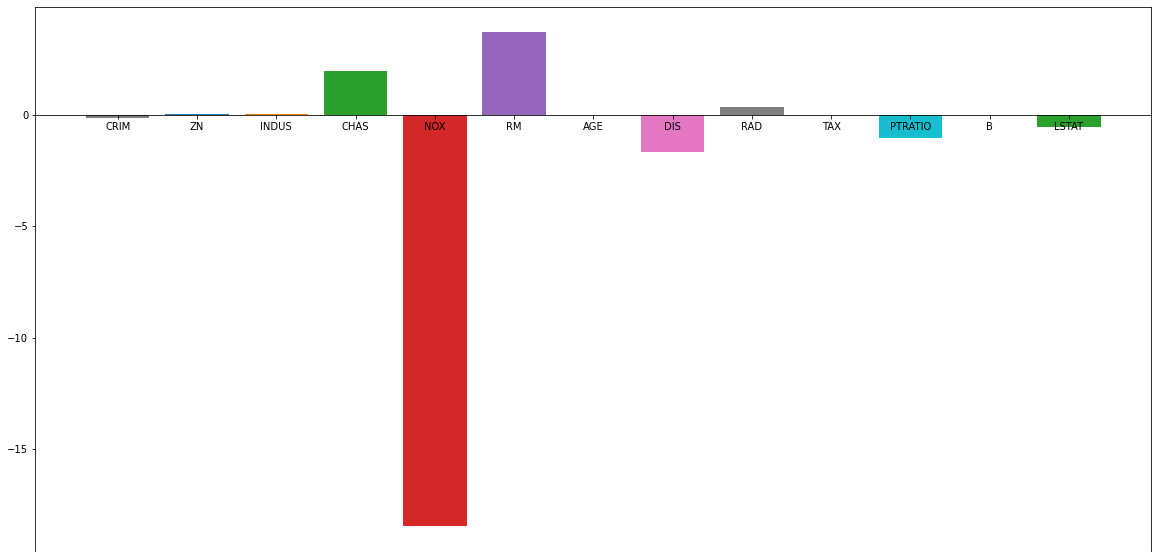

In [35]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lreg_coefficient["Columns"],
lreg_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

Ridge Regression:

In [36]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

21.772198029536142
    Columns  Coefficient Estimate
0      CRIM             -0.123274
1        ZN              0.054844
2     INDUS             -0.009986
3      CHAS              1.704186
4       NOX             -9.806229
5        RM              3.768540
6       AGE             -0.005448
7       DIS             -1.536202
8       RAD              0.341078
9       TAX             -0.013617
10  PTRATIO             -0.962688
11        B              0.008795
12    LSTAT             -0.588986


In [37]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 10)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

22.665181965900672
    Columns  Coefficient Estimate
0      CRIM             -0.120195
1        ZN              0.057328
2     INDUS             -0.041383
3      CHAS              1.089537
4       NOX             -1.870504
5        RM              3.557987
6       AGE             -0.009792
7       DIS             -1.418456
8       RAD              0.335369
9       TAX             -0.014670
10  PTRATIO             -0.887418
11        B              0.009120
12    LSTAT             -0.625201


In [38]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 5)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

22.375381840906094
    Columns  Coefficient Estimate
0      CRIM             -0.120757
1        ZN              0.056578
2     INDUS             -0.035844
3      CHAS              1.331273
4       NOX             -3.403235
5        RM              3.698426
6       AGE             -0.009926
7       DIS             -1.445731
8       RAD              0.333365
9       TAX             -0.014351
10  PTRATIO             -0.895313
11        B              0.009080
12    LSTAT             -0.610149


In [39]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 50)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

23.44733183930263
    Columns  Coefficient Estimate
0      CRIM             -0.118605
1        ZN              0.059638
2     INDUS             -0.046675
3      CHAS              0.467045
4       NOX             -0.400226
5        RM              2.689777
6       AGE             -0.002220
7       DIS             -1.335710
8       RAD              0.355711
9       TAX             -0.015640
10  PTRATIO             -0.913332
11        B              0.008933
12    LSTAT             -0.694768


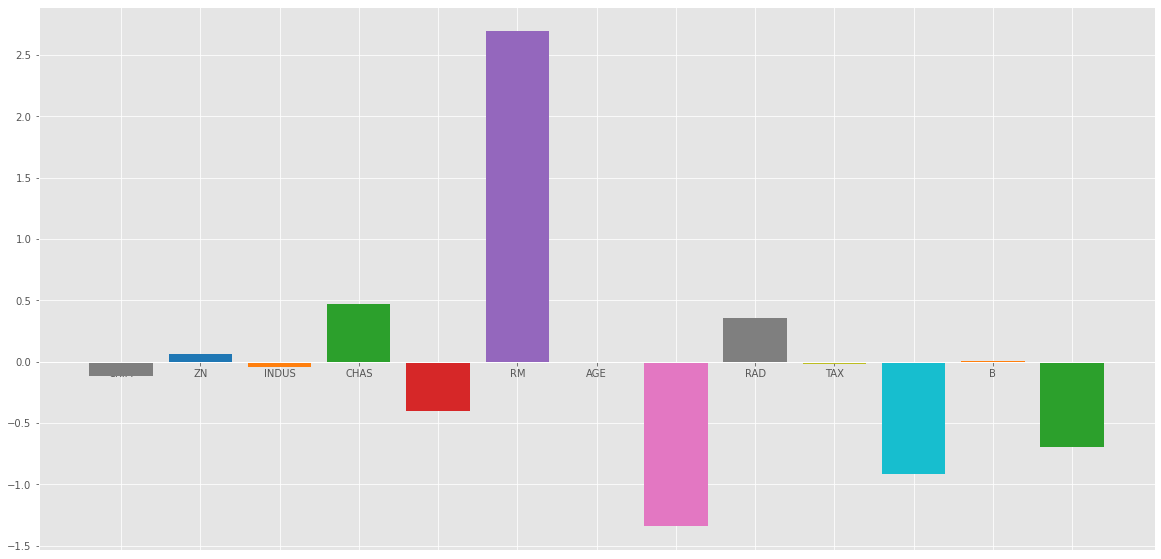

In [40]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

Lasso Regression:

In [41]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 24.15093728771209
    Columns  Coefficient Estimate
0      CRIM             -0.082076
1        ZN              0.052993
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.049981
6       AGE              0.021419
7       DIS             -0.790992
8       RAD              0.313217
9       TAX             -0.015109
10  PTRATIO             -0.837975
11        B              0.008010
12    LSTAT             -0.818402


In [42]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 10)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 27.117798770081396
    Columns  Coefficient Estimate
0      CRIM             -0.000000
1        ZN              0.027601
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX              0.000000
5        RM              0.000000
6       AGE              0.003907
7       DIS             -0.000000
8       RAD              0.000000
9       TAX             -0.008223
10  PTRATIO             -0.000000
11        B              0.006957
12    LSTAT             -0.617581


In [43]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 20)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 33.81666335137812
    Columns  Coefficient Estimate
0      CRIM             -0.000000
1        ZN              0.031728
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.000000
6       AGE             -0.000000
7       DIS             -0.000000
8       RAD              0.000000
9       TAX             -0.013788
10  PTRATIO             -0.000000
11        B              0.009478
12    LSTAT             -0.298480


In [44]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 50)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 50.771322848761116
    Columns  Coefficient Estimate
0      CRIM             -0.000000
1        ZN              0.000000
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.000000
6       AGE             -0.000000
7       DIS              0.000000
8       RAD              0.000000
9       TAX             -0.020455
10  PTRATIO             -0.000000
11        B              0.009955
12    LSTAT             -0.000000


ELASTIC NET

In [45]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff


Mean Squared Error on test set 24.419262834600854


,Columns,Coefficient Estimate
0,CRIM,-0.095649
1,ZN,0.057146
2,INDUS,-0.004992
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.981572
6,AGE,0.022137
7,DIS,-0.851168
8,RAD,0.349628
9,TAX,-0.016453


In [46]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 10)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 26.434012756611455


,Columns,Coefficient Estimate
0,CRIM,-0.000000
1,ZN,0.044216
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,0.000000
5,RM,0.000000
6,AGE,0.027509
7,DIS,-0.000000
8,RAD,0.000000
9,TAX,-0.008119


In [47]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 50)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 43.64660738717042


,Columns,Coefficient Estimate
0,CRIM,-0.000000
1,ZN,0.037909
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.000000
6,AGE,-0.000000
7,DIS,-0.000000
8,RAD,0.000000
9,TAX,-0.017739


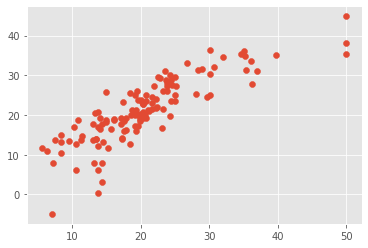

In [49]:
plt.scatter(y_test,lreg_y_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


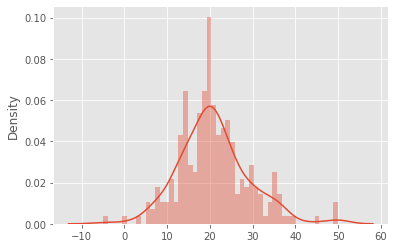

In [53]:
#residual plot
import seaborn as sns
sns.distplot((y_test,lreg_y_pred),bins=50) ;

Conclusion :
From the above analysis we can reach the following conclusion about different regularization methods:

Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values.

Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables.

Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc.

Elastic Net is a combination of both of the above regularization. It contains both the L1 and L2 as its penalty term. It performs better than Ridge and Lasso Regression for most of the test cases.
